Write an explanation of what you
observed within this figure (explain the changes of over time, the influence of initial and boundary conditions). Define the values of 𝑟�1, 𝑟�2, 𝑟�3, 𝑟�4, 𝑟�5 using formulas at the end
of the exercise sheet.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
func = lambda x: np.sin(10 * np.pi * x)

# 747
M = 140 # Matriculation Number
c = 0.2 + (0.4 * M /1000) # Speed of wave in medium

# Time steps required
t1 = np.round(0.1 * (4.2 - (0.7 * M /1000)),4)
t2 = np.round(0.2 * (4.2 - (0.7 * M /1000)),4)
t3 = np.round(0.5 * (4.2 - (0.7 * M /1000)),4)
t4 = np.round(0.9 * (4.2 - (0.7 * M /1000)),4)
t5 = np.round((4.2 - (0.7 * M /1000)),4)

In [3]:
# Time and space discretization

dx = 0.001# Discretization in space
dt = t1 / 1000 # Discretization on time

CFL = c * dt / dx
print("CFL = ", CFL, "< 1 for stability condition")

CFL =  0.1050112 < 1 for stability condition


In [19]:
from dataclasses import dataclass
from enum import Enum

class BoundaryCondition(Enum):
    DIRICHLET = "dirichlet"
    NEUMANN = "neumann"
    PERIODIC = "periodic"

@dataclass
class SolutionType:
    dx: float
    dt: float
    boundary_condition: BoundaryCondition

def numerical_solution(solution: SolutionType, animation_name: str = "anim") -> None:

  dx = solution.dx
  dt = solution.dt
  boundary_condition = solution.boundary_condition

  # Space Grid
  X = np.arange(0, 1 + dx, dx)

  # Time array
  T = np.arange(0, 1.5 * t5, dt) # Time array, includes t1, t2, t3, t4, t5 in its steps
  print(f"t1: {t1} or {T[100]}, t2: {t2}or {T[200]}, t3: {t3} or {T[500]}, t4: {t4} or {T[900]}, t5: {t5} or {T[1000]}")

  # Stability condition
  CFL = c * dt / dx
  print("CFL = ", CFL, "< 1 for stability condition")

  if CFL >= 1:
     print("Stability condition not met. Inestable solution.")

  # Initial Conditions
  
  # U at time 0
  u0 = np.zeros_like(X)
  u0[(X > 0.1) & (X <= 0.2)] = func(X[(X > 0.1) & (X <= 0.2)])

  # U at time dt
  u1 = np.zeros_like(X)
  u1[(X > 0.1 + c * dt) & (X <= 0.2 + c * dt)] = func(X[(X > 0.1 + c * dt) & (X <= 0.2 + c * dt)] - c * dt)

  # Snapshots for animated visualization
  snapshots = []

  # Plotting initial condition
  plt.figure(figsize = (12, 8))
  plt.plot(X, u0, label = 't = 0')

  # Stablishing the first two time steps
  u_back = u0
  u_central = u1

  for w in range(len(T)):

    u_new = np.zeros_like(X)


    for i in range(1, len(X) - 1):
      u_new[i] = c**2 * (dt**2 / dx**2) * (u_central[i+1] - 2 * u_central[i] + u_central[i-1]) + 2 * u_central[i] - u_back[i]

    # Applying Boundary Conditions
    if boundary_condition == BoundaryCondition.DIRICHLET:
      u_new[0] = 0
      u_new[-1] = 0
    elif boundary_condition == BoundaryCondition.NEUMANN:
      u_new[0] = u_new[1]
      u_new[-1] = u_new[-2]
    elif boundary_condition == BoundaryCondition.PERIODIC:
      u_new[0] = u_new[-2]
      u_new[-1] = u_new[1]

    if np.round(T[w], 4) in (t1, t2, t3, t4, t5):
      plt.plot(X, u_new, label = f't = {T[w]:.4f}')

    if w % 200 == 0:
        snapshots.append(u_new.copy())

    u_back = u_central
    u_central = u_new

  import matplotlib.animation as animation

  %matplotlib inline
  from matplotlib import rc
  rc('animation', html='jshtml')


  # x es un array 1D con las posiciones
  # snapshots[t] es un array 1D con los valores en esa posición para cada timestep

  fig, ax = plt.subplots()

  line, = ax.plot(X, snapshots[0], lw=2)

  ax.set_xlim(X[0], X[-1])
  ax.set_ylim(
      min(snapshots[0]),-min(snapshots[0])
  )

  def update(frame):
      line.set_ydata(snapshots[frame])
      ax.set_title(f"Timestep {frame}")
      return [line]

  global ani

  ani = animation.FuncAnimation(
      fig,
      update,
      frames=len(snapshots),
      interval=100,
      blit=True
  )

  ani.save(f"{animation_name}.mp4", writer="ffmpeg", fps=10, dpi=100)  # ajusta fps/dpi

  plt.legend()
  plt.show()


t1: 0.4102 or 0.04102, t2: 0.8204or 0.08204, t3: 2.051 or 0.2051, t4: 3.6918 or 0.36918, t5: 4.102 or 0.4102
CFL =  0.01050112 < 1 for stability condition


C:\Users\Juan\AppData\Local\Temp\ipykernel_33816\1988859706.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


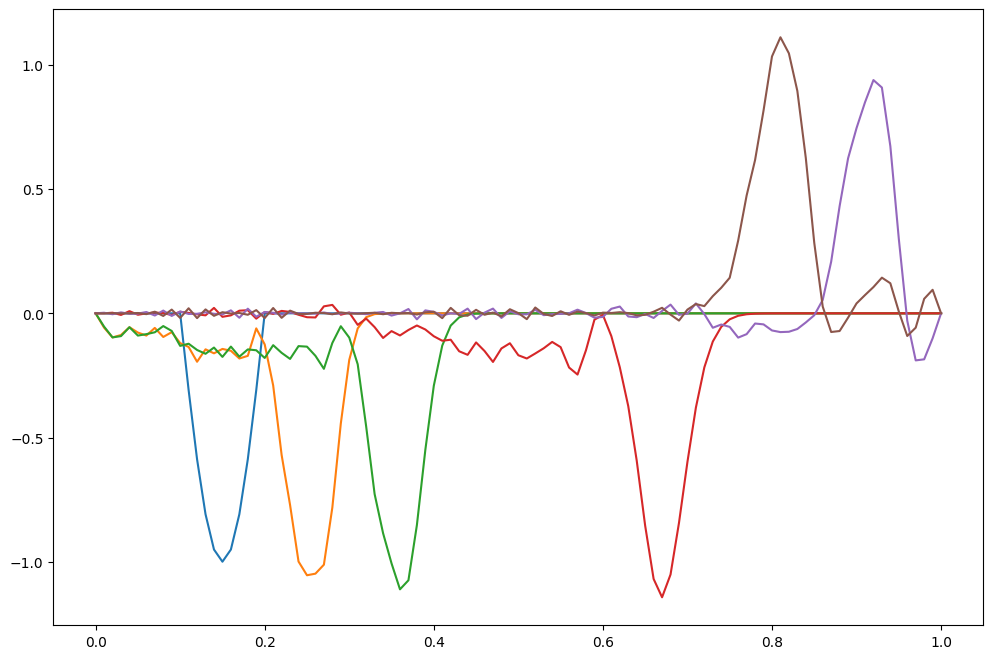

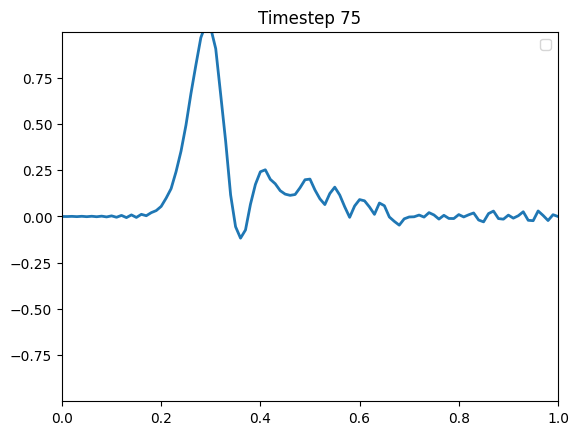

In [20]:
solution_0 = SolutionType(
    dx = 0.01,
    dt = dt,
    boundary_condition = BoundaryCondition.DIRICHLET
)


numerical_solution(solution_0, animation_name="anim_dirichlet_0.01")

t1: 0.4102 or 0.04102, t2: 0.8204or 0.08204, t3: 2.051 or 0.2051, t4: 3.6918 or 0.36918, t5: 4.102 or 0.4102
CFL =  0.1050112 < 1 for stability condition


C:\Users\Juan\AppData\Local\Temp\ipykernel_33816\1988859706.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


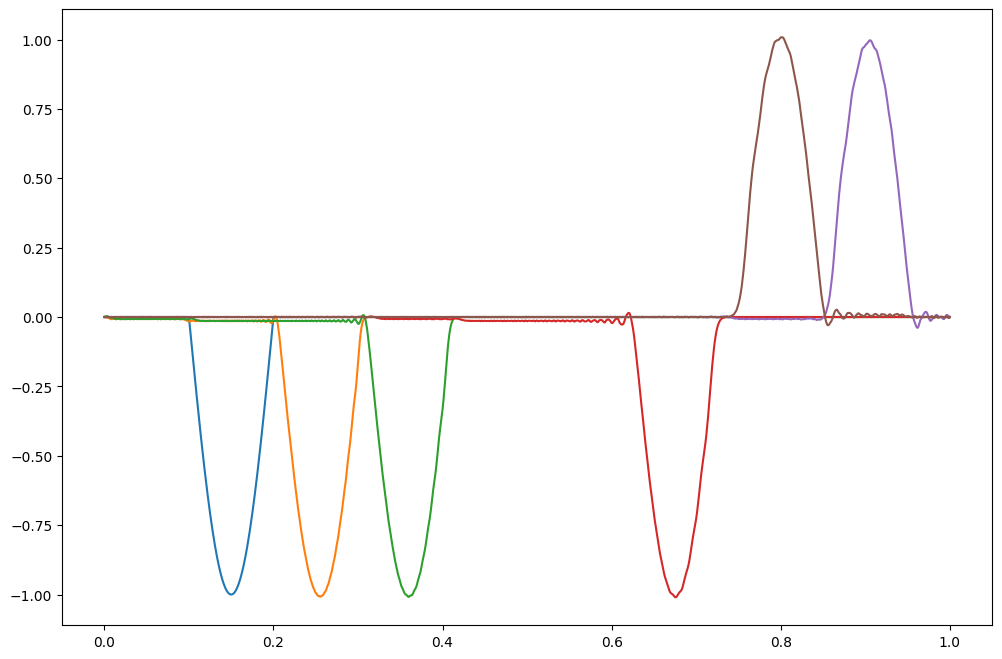

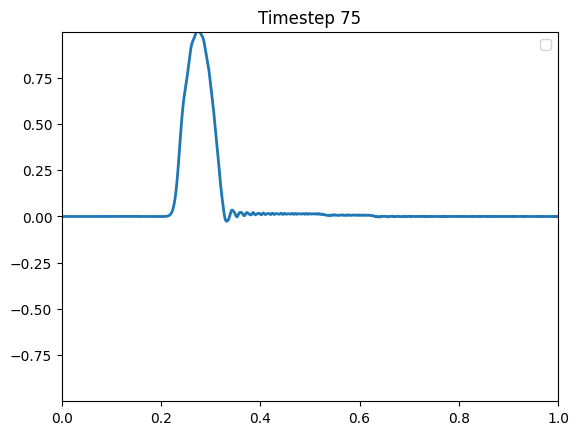

In [21]:
solution_1 = SolutionType(
    dx = dx,
    dt = dt,
    boundary_condition = BoundaryCondition.DIRICHLET
)


numerical_solution(solution_1, animation_name="anim_dirichlet")

t1: 0.4102 or 0.04102, t2: 0.8204or 0.08204, t3: 2.051 or 0.2051, t4: 3.6918 or 0.36918, t5: 4.102 or 0.4102
CFL =  0.1050112 < 1 for stability condition


C:\Users\Juan\AppData\Local\Temp\ipykernel_33816\1988859706.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


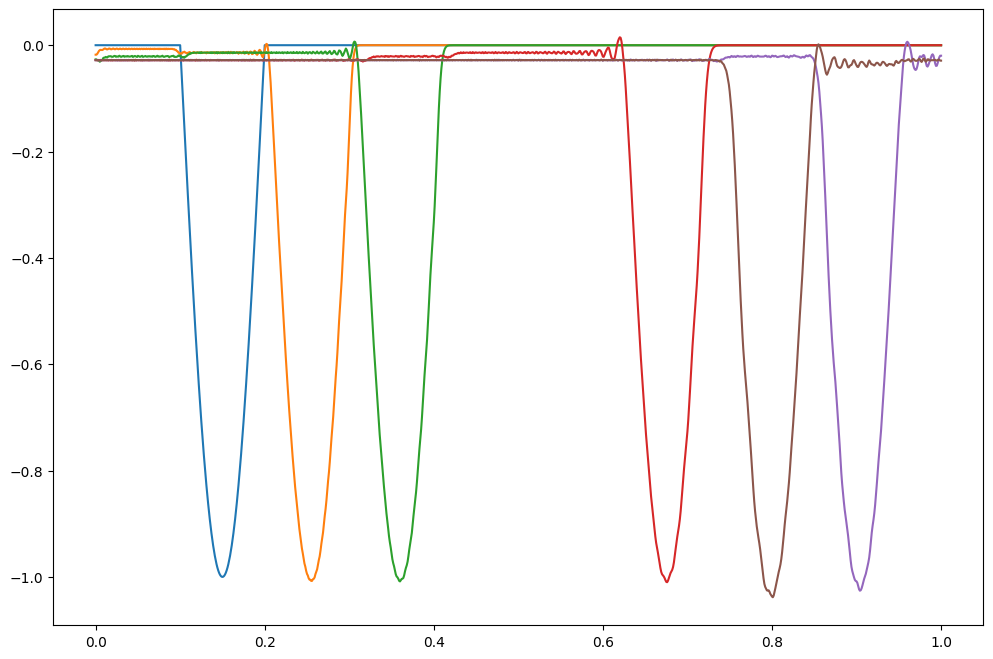

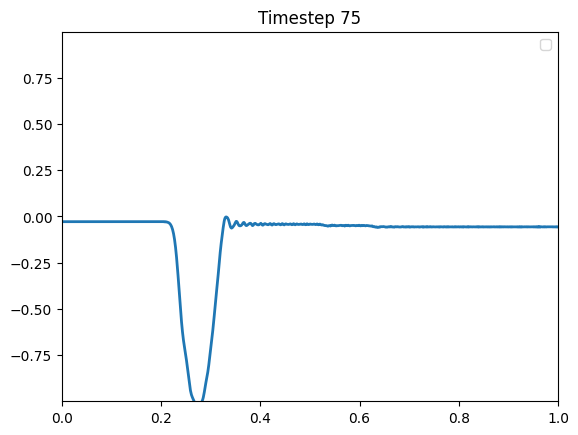

In [22]:
solution_2 = SolutionType(
    dx = dx,
    dt = dt,
    boundary_condition = BoundaryCondition.NEUMANN
)


numerical_solution(solution_2, animation_name="anim_neumann")

t1: 0.4102 or 0.04102, t2: 0.8204or 0.08204, t3: 2.051 or 0.2051, t4: 3.6918 or 0.36918, t5: 4.102 or 0.4102
CFL =  0.1050112 < 1 for stability condition


C:\Users\Juan\AppData\Local\Temp\ipykernel_33816\1988859706.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


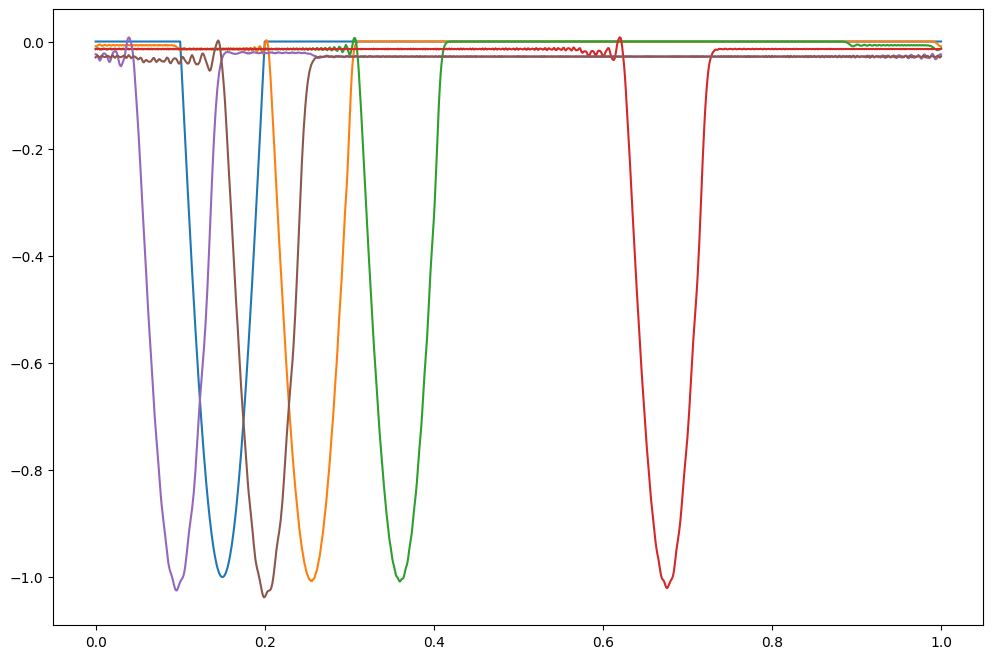

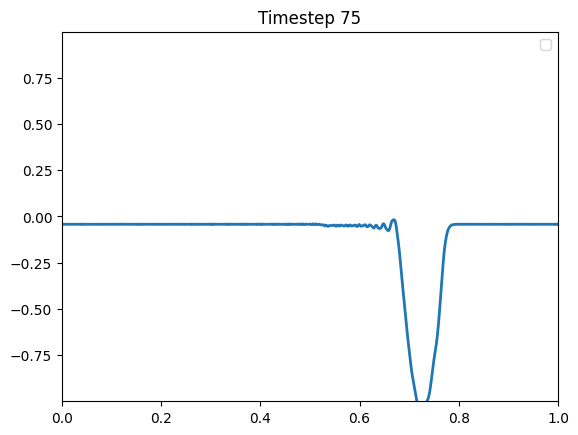

In [23]:
solution_3 = SolutionType(
    dx = dx,
    dt = dt,
    boundary_condition = BoundaryCondition.PERIODIC
)


numerical_solution(solution_3, animation_name="anim_periodic")

In [10]:
# Save snapshots and X for animation with pickle
import pickle
with open("wave_snapshots.pkl", "wb") as f:
    pickle.dump((snapshots, X), f)

In [2]:
# Open the saved snapshots and X
import pickle
with open("wave_snapshots.pkl", "rb") as f:
    snapshots, X = pickle.load(f)

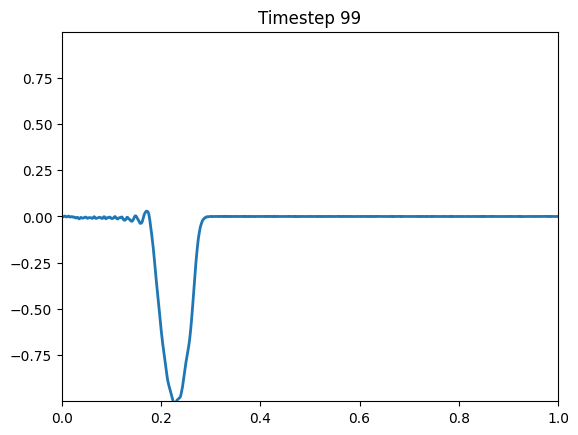

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
from matplotlib import rc
rc('animation', html='jshtml')


# x es un array 1D con las posiciones
# snapshots[t] es un array 1D con los valores en esa posición para cada timestep

fig, ax = plt.subplots()

line, = ax.plot(X, snapshots[0], lw=2)

ax.set_xlim(X[0], X[-1])
ax.set_ylim(
    min(snapshots[0]),-min(snapshots[0])
)

def update(frame):
    line.set_ydata(snapshots[frame])
    ax.set_title(f"Timestep {frame}")
    return [line]

global ani

ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(snapshots),
    interval=100,
    blit=True
)

ani.save("anim.mp4", writer="ffmpeg", fps=10, dpi=100)  # ajusta fps/dpi


ani

